In [1]:
%matplotlib inline

import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline



In [2]:
# Read the TSLA stock data from a CSV file
df = pd.read_csv("TSLA.csv", sep=",")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
1,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
3,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
4,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500


In [4]:
# Check for missing values in the dataset
df.isna().sum()
#checks for missing values (NaN) in the dataset and displays the count of missing values for each column

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       963 non-null    object 
 1   Open       963 non-null    float64
 2   High       963 non-null    float64
 3   Low        963 non-null    float64
 4   Close      963 non-null    float64
 5   Adj Close  963 non-null    float64
 6   Volume     963 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 52.8+ KB


In [6]:
#Convert columns to datetime
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       963 non-null    datetime64[ns]
 1   Open       963 non-null    float64       
 2   High       963 non-null    float64       
 3   Low        963 non-null    float64       
 4   Close      963 non-null    float64       
 5   Adj Close  963 non-null    float64       
 6   Volume     963 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 52.8 KB


In [7]:
# sort by date
df = df.sort_values(by='Date', ascending=True)

In [8]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
1,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
3,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
4,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500
...,...,...,...,...,...,...,...
958,2023-10-23,210.000000,216.979996,202.509995,212.080002,212.080002,150683400
959,2023-10-24,216.500000,222.050003,214.110001,216.520004,216.520004,118231100
960,2023-10-25,215.880005,220.100006,212.199997,212.419998,212.419998,107065100
961,2023-10-26,211.320007,214.800003,204.880005,205.759995,205.759995,115112600


<Axes: xlabel='Date', ylabel='Close'>

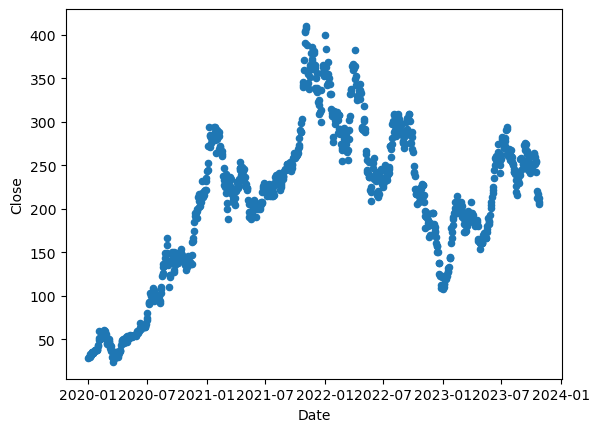

In [9]:
# Plot a scatter chart of 'Close' price over time
df.plot.scatter(x = "Date", y = "Close")
#creates a scatter plot to visualize the closing price of TSLA stock over time

In [10]:
# Calculate the correlation matrix and display it with a color gradient
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Date,Open,High,Low,Close,Adj Close,Volume
Date,1.000000,0.525385,0.524577,0.528134,0.525514,0.525514,-0.397161
Open,0.525385,1.000000,0.998759,0.998270,0.996408,0.996408,-0.643274
High,0.524577,0.998759,1.000000,0.998315,0.998390,0.998390,-0.633894
Low,0.528134,0.998270,0.998315,1.000000,0.998562,0.998562,-0.652880
Close,0.525514,0.996408,0.998390,0.998562,1.000000,1.000000,-0.641483
Adj Close,0.525514,0.996408,0.998390,0.998562,1.000000,1.000000,-0.641483
Volume,-0.397161,-0.643274,-0.633894,-0.652880,-0.641483,-0.641483,1.000000


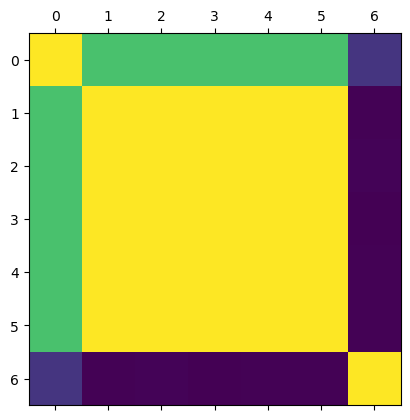

In [11]:
# Create a heatmap to visualize the correlation matrix
plt.matshow(df.corr())
plt.show()

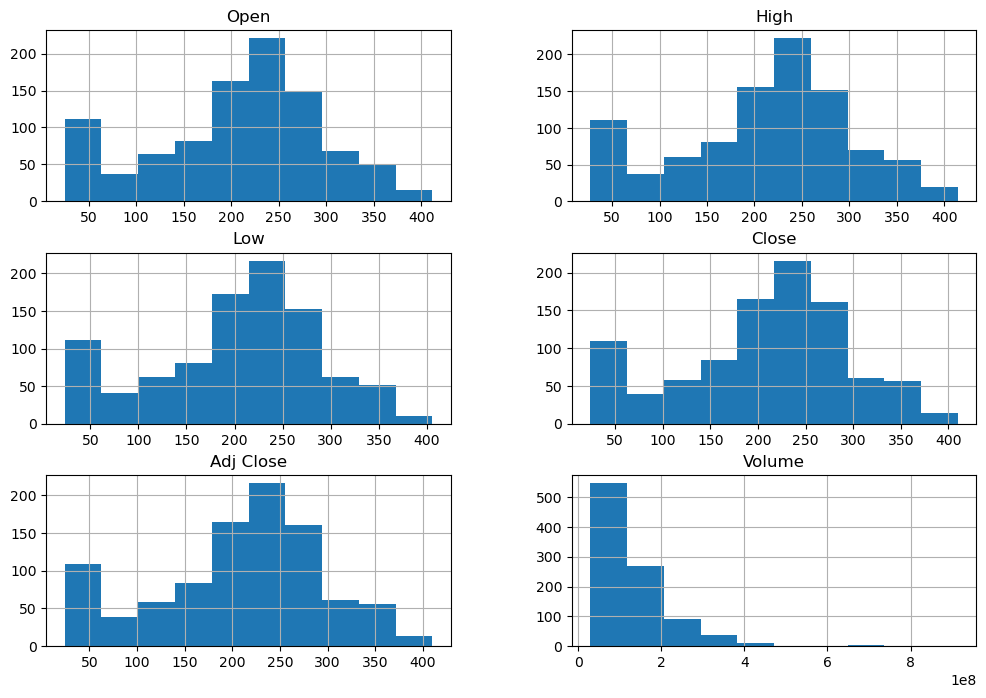

In [12]:
# Create histograms for selected columns in the dataframe
df.hist(column=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], figsize=(12, 8))
plt.show()

In [13]:
df.describe()
#calculates and displays summary statistics for the numerical columns in the dataframe, 
#including count, mean, minimum, maximum

,Date,Open,High,Low,Close,Adj Close,Volume
count,963,963.000000,963.000000,963.000000,963.000000,963.000000,9.630000e+02
mean,2021-11-29 07:54:01.121495296,207.996564,212.770989,202.844759,207.915389,207.915389,1.337677e+08
min,2020-01-02 00:00:00,24.980000,26.990667,23.367332,24.081333,24.081333,2.940180e+07
25%,2020-12-14 12:00:00,150.014999,153.989998,145.794006,149.506668,149.506668,7.608435e+07
50%,2021-11-29 00:00:00,222.600006,226.990005,216.666672,221.309998,221.309998,1.049724e+08
75%,2022-11-10 12:00:00,266.230011,271.169998,260.666656,265.279999,265.279999,1.615558e+08
max,2023-10-27 00:00:00,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08
std,NaN,87.634550,89.384019,85.571974,87.438142,87.438142,9.045744e+07


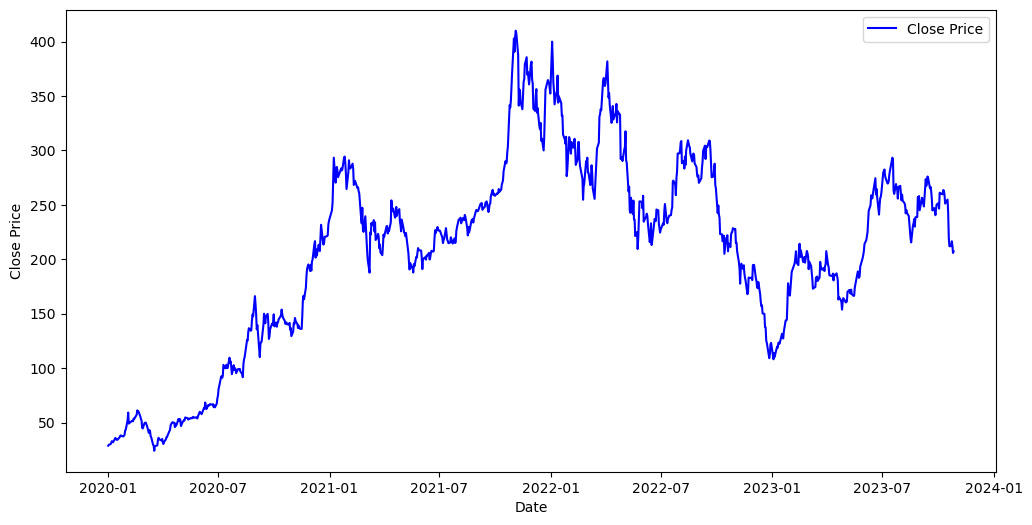

In [14]:
# Create a line plot of the 'Close' price over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

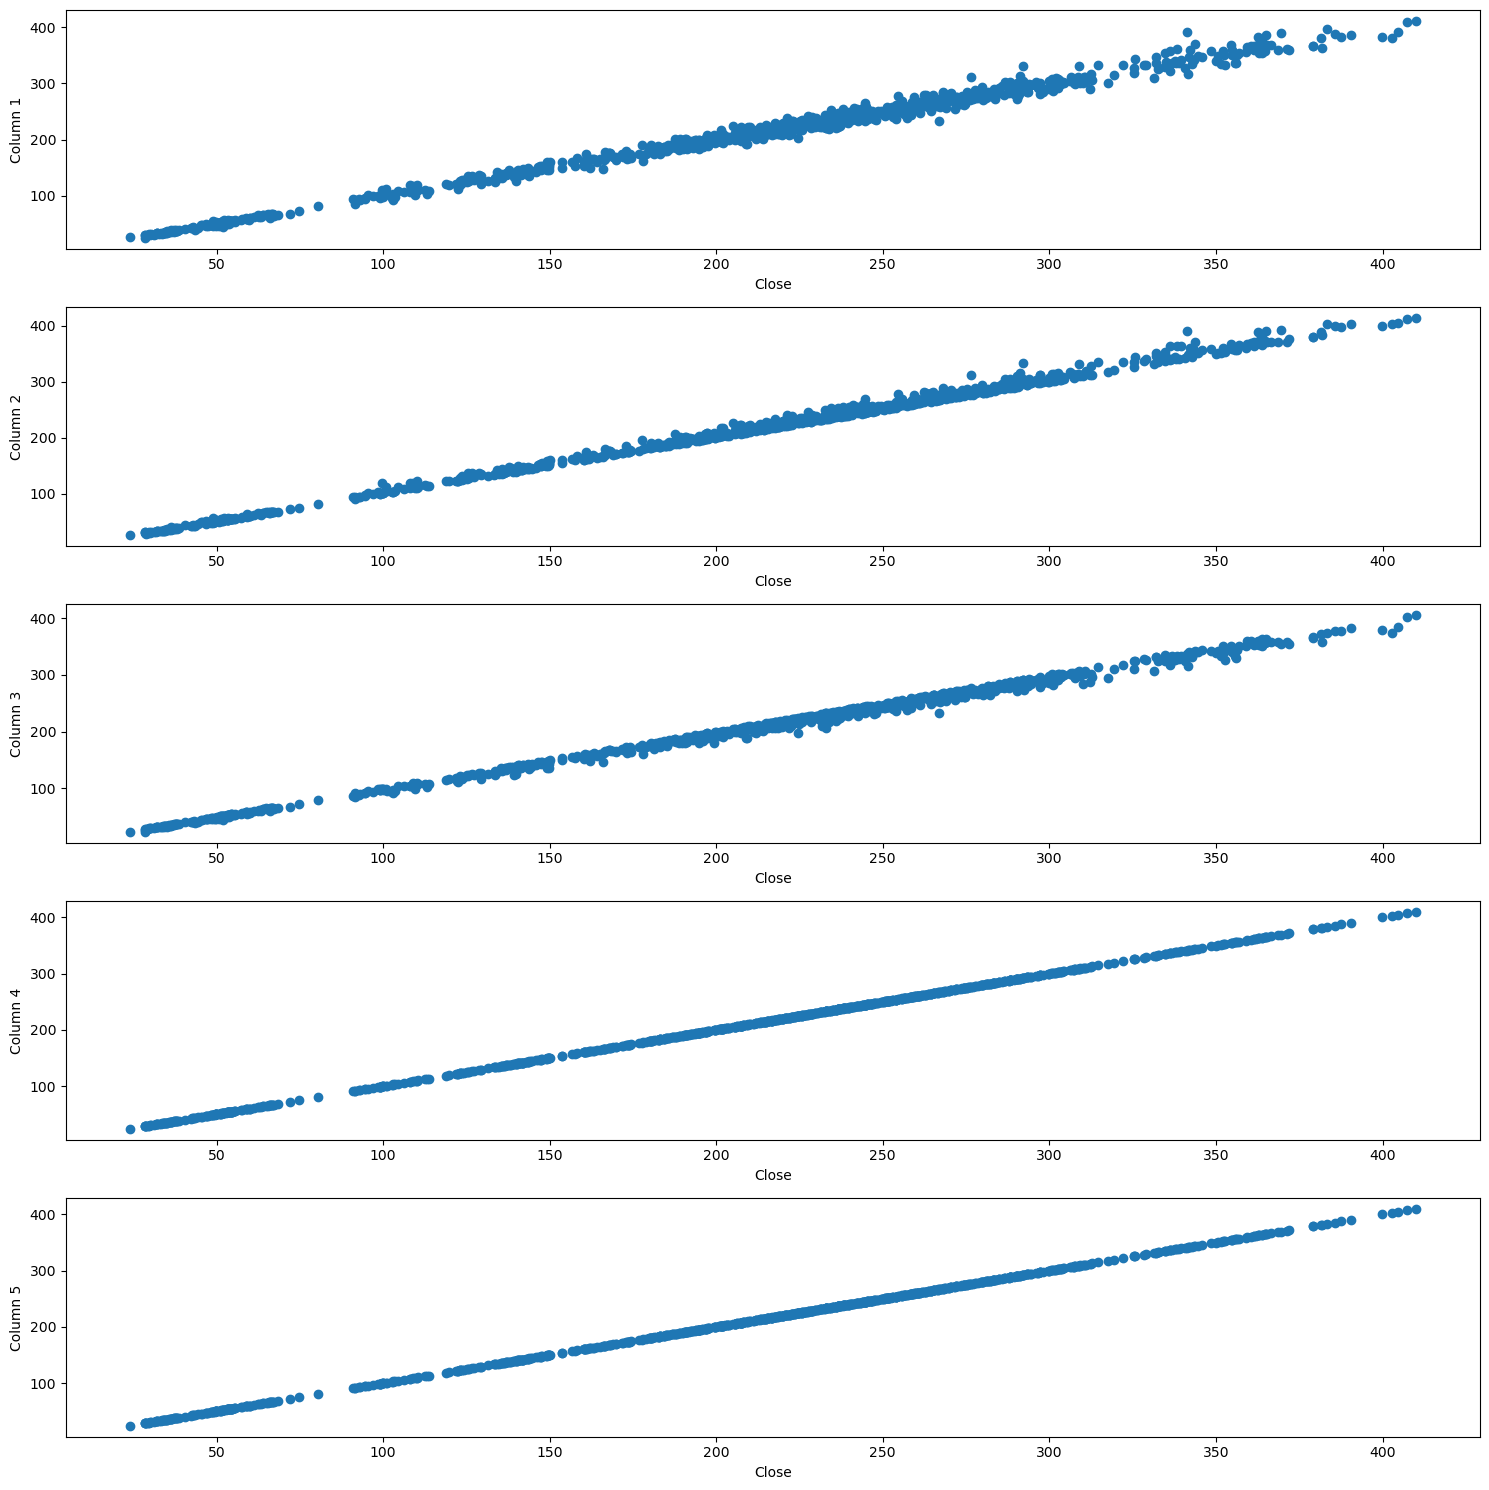

In [15]:
# Scatterplot all columns against the 'Close' column
fig, ax = plt.subplots(df.shape[1] - 2, figsize=(15, 15))  # Figsize (length, height)

# Exclude the 'Date' and 'Close' columns
for i in range(1, df.shape[1] - 1):  # Start from 1 to skip 'Date' and go up to the second-to-last column
    ax[i - 1].scatter(x=df['Close'], y=df.iloc[:, i])
    ax[i - 1].set_xlabel('Close')
    ax[i - 1].set_ylabel(f'Column {i}')

fig.tight_layout()
plt.show()


In [16]:
df['Date'] = pd.to_datetime(df['Date'])
#df['Days'] = (df['Date'] - df['Date'].min()).dt.days

In [17]:
# Prepare the data for regression
X = pd.DataFrame(df['Date'])
y = pd.DataFrame(df['Close'])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# 'Date' column as the independent variable (X) and the 'Close' column as the dependent variable (y)
# It then splits the data into training and testing sets.

In [19]:
# Perform polynomial regression with different degrees
degrees = 10
model = make_pipeline(preprocessing.MinMaxScaler(),preprocessing.PolynomialFeatures(degrees),LinearRegression())
model.fit(X_train, y_train)

# Predict the 'Close' values on the test data
y_pred = model.predict(X_test)


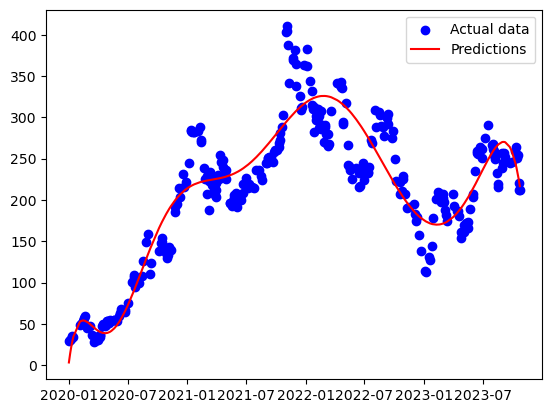

MSE = 1118.3099225871638


In [20]:
# Sort the test data and predictions for plotting
sorted_indices = X_test['Date'].argsort()
X_test_sorted = X_test.iloc[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plot the actual and predicted 'Close' values
plt.scatter(X_test_sorted['Date'], y_test.iloc[sorted_indices], color='blue', label="Actual data")
plt.plot(X_test_sorted['Date'], y_pred_sorted, color='red', label="Predictions")
plt.legend()
plt.show()

#plt.scatter(X_test['Days'], y_test, color='blue', label="Actual data")
#plt.plot(X_test['Days'], y_pred, color='red', label="Predictions")
#plt.legend()
#plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_test,y_pred)))



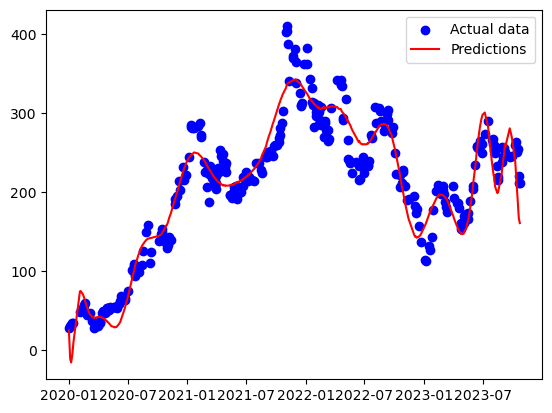

MSE = 631.928924057363
R^2 Score: 91.53%
MAPE: 13.03%


In [21]:
# Repeat the regression with a different degree and evaluate the model
degrees = 50
model = make_pipeline(preprocessing.MinMaxScaler(),preprocessing.PolynomialFeatures(degrees),LinearRegression())
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Sort the test data and predictions for plotting
sorted_indices = X_test['Date'].argsort()
X_test_sorted = X_test.iloc[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]


# Plot the actual and predicted 'Close' values
plt.scatter(X_test_sorted['Date'], y_test.iloc[sorted_indices], color='blue', label="Actual data")
plt.plot(X_test_sorted['Date'], y_pred_sorted, color='red', label="Predictions")
plt.legend()
plt.show()

# Calculate and display the MSE
print( "MSE = "+str(metrics.mean_squared_error(y_test,y_pred)))

# Calculate and display the R-squared score
score = model.score(X_test, y_test)
print(f"R^2 Score: {score * 100:.2f}%")

# Define a function to calculate the Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate and display the MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape:.2f}%")


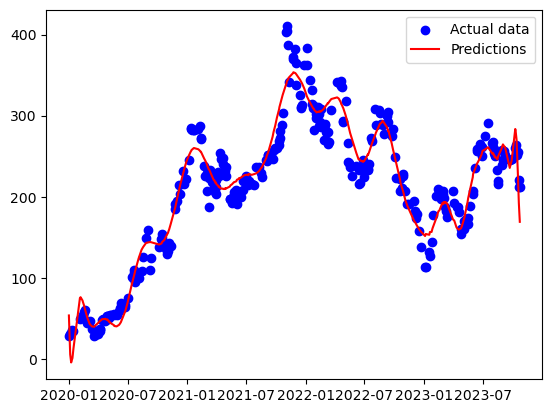

MSE = 441.3975543592498
R^2 Score: 94.08%
MAPE: 10.70%


In [22]:
#the code repeats the regression with a different degree, evaluates the model, calculates and displays the MSE and MAPE
degrees = 92
model = make_pipeline(preprocessing.MinMaxScaler(),preprocessing.PolynomialFeatures(degrees),LinearRegression())
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


sorted_indices = X_test['Date'].argsort()
X_test_sorted = X_test.iloc[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

plt.scatter(X_test_sorted['Date'], y_test.iloc[sorted_indices], color='blue', label="Actual data")
plt.plot(X_test_sorted['Date'], y_pred_sorted, color='red', label="Predictions")
plt.legend()
plt.show()

print( "MSE = "+str(metrics.mean_squared_error(y_test,y_pred)))

score = model.score(X_test, y_test)
print(f"R^2 Score: {score * 100:.2f}%")

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape:.2f}%")


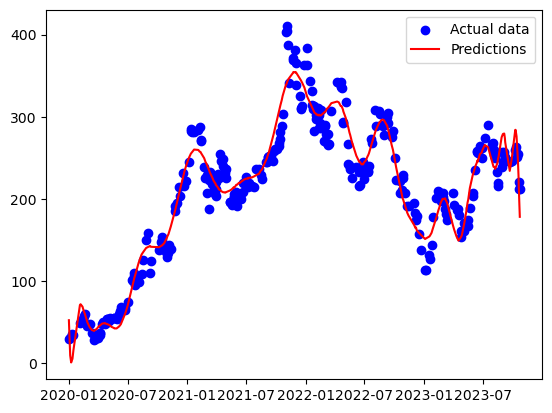

MSE = 436.3845903152247
R^2 Score: 94.15%
MAPE: 10.29%


In [23]:
#the code repeats the regression with a different degree, evaluates the model, calculates and displays the MSE and MAPE
degrees = 100
model = make_pipeline(preprocessing.MinMaxScaler(),preprocessing.PolynomialFeatures(degrees),LinearRegression())
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


sorted_indices = X_test['Date'].argsort()
X_test_sorted = X_test.iloc[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

plt.scatter(X_test_sorted['Date'], y_test.iloc[sorted_indices], color='blue', label="Actual data")
plt.plot(X_test_sorted['Date'], y_pred_sorted, color='red', label="Predictions")
plt.legend()
plt.show()

print( "MSE = "+str(metrics.mean_squared_error(y_test,y_pred)))


def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

score = model.score(X_test, y_test)
print(f"R^2 Score: {score * 100:.2f}%")


mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape:.2f}%")
